In [1]:
import matplotlib.pyplot as plt
import numpy as np

from blade_design import blade_design, airfoil_path, process_file
from bemt import coefficients_extrapolation

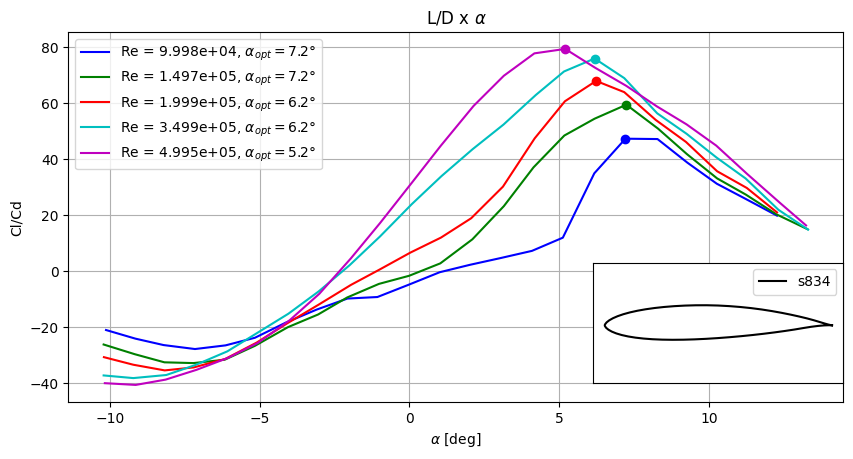

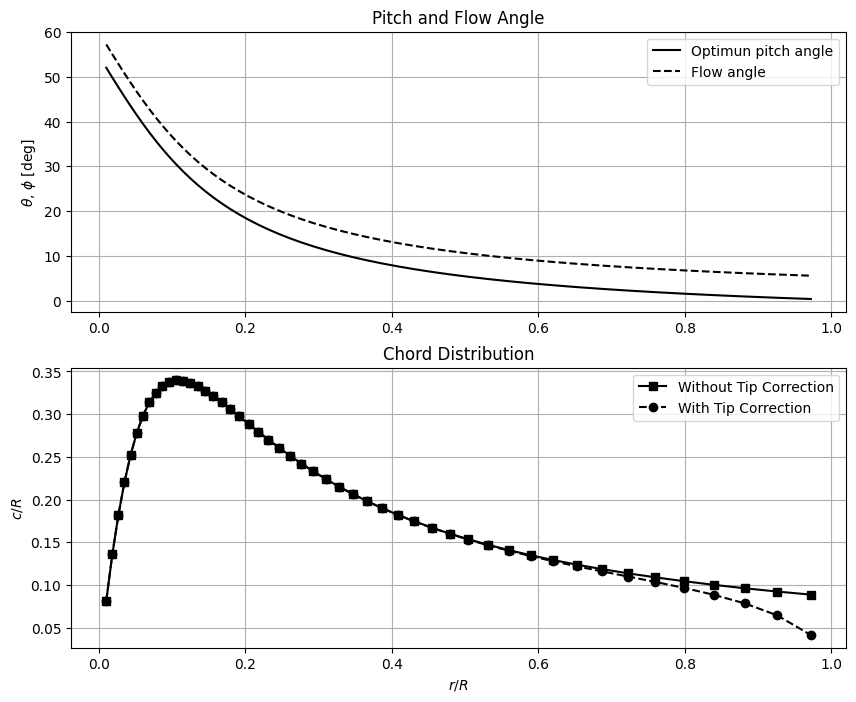

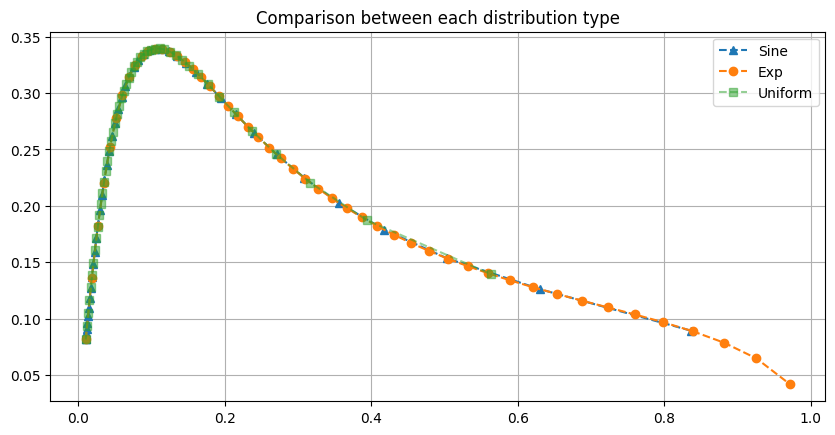

In [2]:
df1 = blade_design('s834', 7, 2, number_of_sections=50,plot=False)
df2 = blade_design('s834', 7, 2, number_of_sections=50, section_distribution='sine', plot=False)
df3 = blade_design('s834', 7, 2, number_of_sections=50, section_distribution='exp', plot=True)

# %% Comparison between each distribution type
plt.figure(figsize=[10, 4.8])

plt.plot(df2['r/R'],df2['c/R']*df2['Tip Correction'], '^--',label = 'Sine')
plt.plot(df3['r/R'],df3['c/R']*df3['Tip Correction'], 'o--',label = 'Exp')
plt.plot(df1['r/R'],df1['c/R']*df1['Tip Correction'], 's--',alpha = 0.5, label = 'Uniform')

plt.title('Comparison between each distribution type')

plt.grid()
plt.legend()
plt.show()

### Coefficients Extrapolation

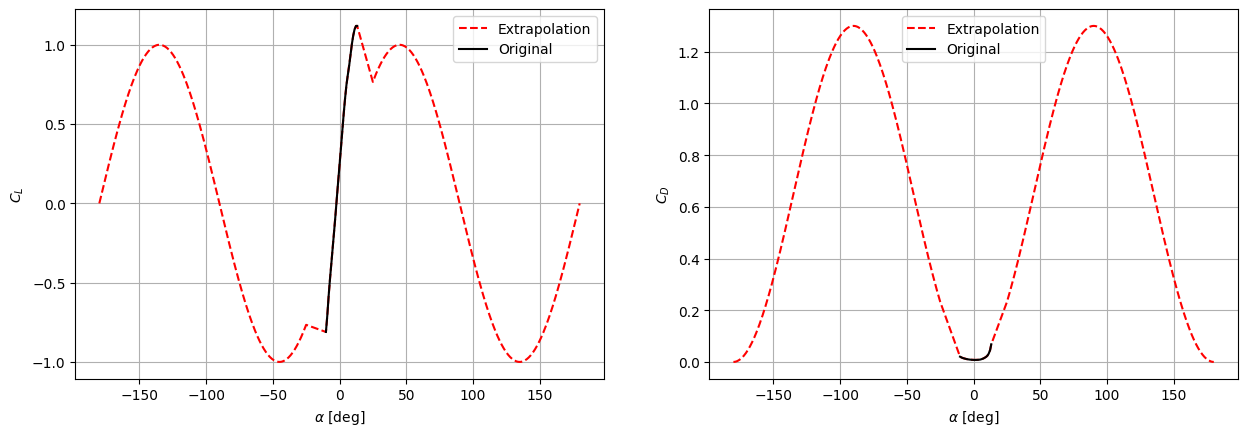

In [4]:
airfoil_name = 's834'
c_lift_drag = process_file(airfoil_path.joinpath(f'{airfoil_name}_c_drg.txt'))
re = max(c_lift_drag, key = lambda x: float(x.split()[-1]))

df_extra = coefficients_extrapolation(c_lift_drag[re][0], df3)
# alpha = np.deg2rad(np.concatenate((np.linspace(-90, -15, 100), np.linspace(15, 90, 100))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 4.8])

ax1.plot(df_extra['alpha'],  df_extra['Cl'], 'r--', label = 'Extrapolation')
ax1.plot(c_lift_drag[re][0][:, 0],  c_lift_drag[re][0][:, 1], 'k',  label = 'Original')

ax1.set_xlabel(r'$\alpha$ [deg]')
ax1.set_ylabel(r'$C_L$')
ax1.legend()
ax1.grid()

ax2.plot(df_extra['alpha'],  df_extra['Cd'], 'r--', label = 'Extrapolation')
ax2.plot(c_lift_drag[re][0][:, 0],  c_lift_drag[re][0][:, 2], 'k', label = 'Original')

ax2.set_xlabel(r'$\alpha$ [deg]')
ax2.set_ylabel(r'$C_D$')
ax2.legend()
ax2.grid()

plt.show()



In [14]:
df_extra

,alpha,Cl,Cd
0,-180.000000,2.449294e-16,1.949688e-32
1,-179.221106,2.718520e-02,2.402307e-04
2,-178.442211,5.435030e-02,9.607454e-04
3,-177.663317,8.147523e-02,2.161011e-03
4,-176.884422,1.085399e-01,3.840141e-03
...,...,...,...
419,176.884422,-1.085399e-01,3.840141e-03
420,177.663317,-8.147523e-02,2.161011e-03
421,178.442211,-5.435030e-02,9.607454e-04
422,179.221106,-2.718520e-02,2.402307e-04
